In [1]:
import pandas as pd
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import seaborn as sns
import re
plt.style.use('ggplot')

In [2]:
cars = pd.read_csv("cars.csv")

In [3]:
cars["drive"] = cars["drive"].str.strip()
cars["title"] = cars["title"].str.strip()
cars["exter"] = cars["exter"].str.strip()
cars["inter"] = cars["inter"].str.strip()
cars["made"] = cars["made"].str.strip()
cars["model"] = cars["model"].str.strip()
cars["eng"] = cars["eng"].str.strip()
cars["tran"] = cars["tran"].str.strip()
cars["mileage"] = cars["mileage"].str.strip()

In [6]:
cars["price"].replace(["Not Priced","FWD"], None, inplace = True)
cars["price"].replace({'\$': '', ',': ''}, regex=True, inplace = True)
cars["mileage"].replace({',': ''}, regex=True, inplace = True)

In [7]:
cars["mileage"].replace("Not provided", np.NaN, inplace = True)
cars["price"].replace([None, 1], np.NaN, inplace = True)

In [8]:
cars["exter"].fillna("UNKNOW", inplace = True)
cars.dropna(subset = ["price"],inplace = True)
cars.dropna(subset = ["mileage"],inplace = True)
cars.isna().sum()

cty         8295
drive       3381
eng         1742
exter          0
fuel           0
hwy         8295
inter       5519
made           0
mileage        0
model          0
price          0
slreview    4584
slrzip      1170
title          0
tran         992
year           0
dtype: int64

In [9]:
cars["mileage"] = cars["mileage"].astype(int)
cars["price"] = cars["price"].astype(int)

In [11]:
cars["drive"].replace(["4MATIC", "quattro", "Quattro AWD", "Four Wheel Drive", "All Wheel Drive", 
                        "All-Wheel Drive with Locking Differential", "All-Wheel Drive with Locking and Limited-Slip Differential", 
                        "ALL-WHEEL DRIVE", "4x4/4-wheel drive", "Four-Wheel Drive with Locking and Limited-Slip Differential", 
                        "4x4", "4WD", "4MATICA?", "4MATIC AWD", "4MATIC 4WD", "FOUR-WHEEL DRIVE", "Four-Wheel",
                        "4x2","4X2", "4X4", "CVT 7-Speed", "All-wheel Drive"], "AWD", inplace = True)

In [12]:
cars["drive"].replace(["Front-wheel Drive", "FrontTrak", "FRONT-WHEEL DRIVE", "Front Wheel Drive", "2WD", "Unspecified",
                        "Front-Wheel Drive with Limited-Slip Differential", "Front-Wheel Drive"], "FWD", inplace = True)

In [13]:
cars["drive"].replace(["Rear-wheel Drive", "Rear-Wheel Drive with Limited-Slip Differential", "4x2/2-wheel drive", 
                        "Rear-Wheel Drive", "Rear Wheel Drive", "Automatic 8-Speed"], "RWD", inplace = True)
cars.groupby("drive")["title"].count().sort_values(ascending = False)

drive
AWD    30621
FWD    17807
RWD     4796
Name: title, dtype: int64

In [15]:
cars.loc[cars["exter"].str.contains("White"), "exter"] = "White"
cars.loc[cars["exter"].str.contains("Black"), "exter"] = "Black"
cars.loc[cars["exter"].str.contains("Silver"), "exter"] = "Silver"
cars.loc[cars["exter"].str.contains("Blue"), "exter"] = "Blue"
cars.loc[cars["exter"].str.contains("Red"), "exter"] = "Red"
cars.loc[cars["exter"].str.contains("Gray"), "exter"] = "Gray"
cars.loc[cars["exter"].str.contains("Yellow"), "exter"] = "Yellow"
cars.loc[cars["exter"].str.contains("Brown"), "exter"] = "Brown"
cars.loc[cars["exter"].str.contains("Grey"), "exter"] = "Gray"

In [19]:
scatter_df = cars.loc[(cars["year"]>2000) & (cars["made"] == "Mercedes-Benz")]
scatter_df = scatter_df[["year", "price"]]

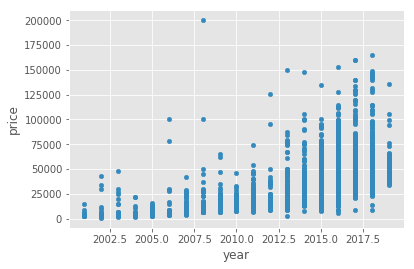

In [20]:
scatter_df.plot.scatter(x = "year", y = "price")

In [21]:
scatter_df1 = cars.loc[(cars["mileage"]<200000) & (cars["price"]<300000) & (cars["made"] == "Chevrolet")]
scatter_df1 = scatter_df1[["price", "mileage"]]

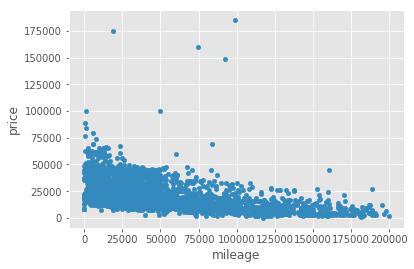

In [22]:
scatter_df1.plot.scatter(x = "mileage", y = "price")

In [23]:
maderank = cars.groupby("made")[["title"]].count().sort_values(by = "title",ascending = False)
samplesize = maderank.reset_index().head(16)

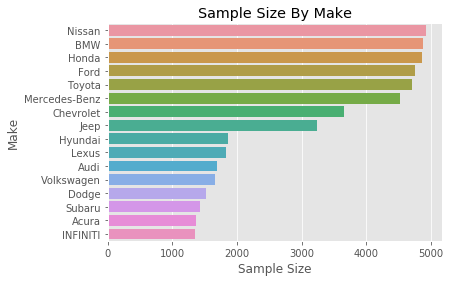

In [28]:
sns.barplot(x="title",y="made",data = samplesize)
plt.xlabel("Sample Size")
plt.ylabel("Make")
plt.title("Sample Size By Make")
plt.savefig("plots/ssize.pdf")

In [16]:
t10cars = cars.loc[cars["made"].isin(["Nissan","Honda", "BMW", "Ford", "Toyota", "Mercedes-Benz", "Chevrolet", "Jeep",
                           "Hyundai", "Lexus"]) & (cars["year"] > 2000)]

In [151]:
t10cars.shape

(38982, 16)

In [210]:
pricemean = t10cars.groupby("made")[["price"]].mean().sort_values(by="price", ascending = False)

In [221]:
pricemean.reset_index(inplace=True)

In [211]:
milemean = t10cars.groupby("made")[["mileage"]].mean().sort_values(by="mileage", ascending = False)

In [226]:
milemean.reset_index(inplace=True)

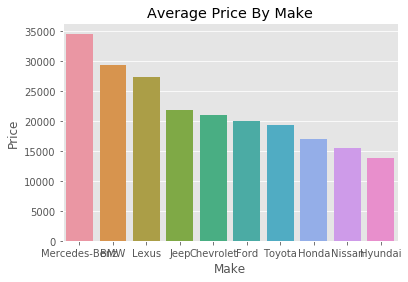

In [225]:
sns.barplot(x="made",y="price",data = pricemean)
plt.xlabel("Make")
plt.ylabel("Price")
plt.title("Average Price By Make")
plt.savefig("plots/meanprice.pdf")

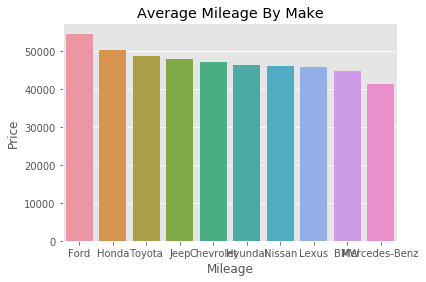

In [229]:
sns.barplot(x="made",y="mileage",data = milemean)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Average Mileage By Make")
plt.savefig("plots/meanmile.pdf")

In [17]:
cars.loc[cars["year"]<2000].shape

(297, 16)

In [18]:
t10 = t10cars[t10cars.groupby("year").price.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
t10 = t10[t10.groupby("year").mileage.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]

In [183]:
t10.isna().sum()

cty         4370
drive       2125
eng          892
exter          0
fuel           0
hwy         4370
inter       3992
made           0
mileage        0
model          0
price          0
slreview    2929
slrzip       668
title          0
tran         429
year           0
age            0
dtype: int64

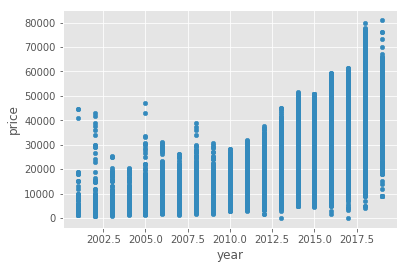

In [160]:
t10.plot.scatter(x = "year", y = "price")

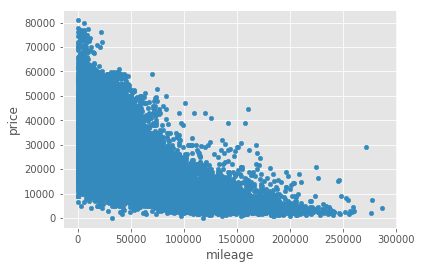

In [159]:
t10.plot.scatter(x = "mileage", y = "price")

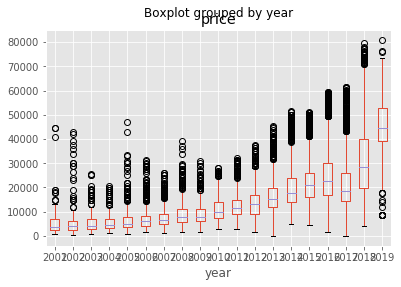

In [158]:
t10.boxplot(by = 'year', column = 'price')

In [19]:
to10 = t10.drop(t10.loc[t10["price"] == 1].index)

In [165]:
t10.to_csv("t102.csv",index=False)

In [692]:
t10.groupby("made")["title"].count().sort_values(ascending = False)

made
Nissan           4867
Honda            4833
BMW              4768
Toyota           4636
Ford             4588
Mercedes-Benz    4070
Chevrolet        3494
Jeep             3214
Hyundai          1864
Lexus            1803
Name: title, dtype: int64

In [329]:
t10.loc[(t10["made"] == "BMW")].groupby("model")["title"].count().sort_values(ascending = False)

model
X5       769
328      659
X3       420
535      322
528      291
X1       264
428      251
X6       201
320      162
335      118
750      109
430      102
435       94
650       91
330       75
M3        75
550       72
X2        67
X4        51
M4        49
640       44
530       44
i3        37
228       37
440       35
M5        34
740       31
340       30
M6        28
325       22
        ... 
328d       7
128        7
135        6
528i       5
428i       5
M2         5
535i       4
430i       4
550i       3
330e       3
540i       3
545        2
M550       2
M240       2
745        2
340I       2
535d       2
645        1
530xi      1
330I       1
650i       1
740e       1
335i       1
760        1
AWD        1
320i       1
i          1
3          1
435I       1
440I       1
Name: title, Length: 68, dtype: int64

In [20]:
t10 = t10.assign(age = 2019 - t10["year"])

In [21]:
honda = t10.loc[t10["made"] == "Honda"][["age", "mileage", "price", "model", "exter"]]
honda.shape

(4810, 5)

In [22]:
honda = honda[honda.groupby("age").price.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
honda = honda[honda.groupby("age").mileage.transform(lambda x: np.abs(x-x.mean())/x.std() < 3)]
honda.shape

(4717, 5)

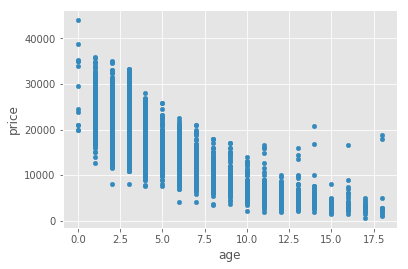

In [126]:
honda.plot.scatter(x = "age", y = "price")

In [23]:
X = honda.drop("price", axis = 1)
X =  X.assign(agesqrt = X.age**2)
X = pd.get_dummies(X)
y = honda["price"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [28]:
lm = linear_model.LinearRegression()

In [29]:
model = lm.fit(X_train,y_train)

In [30]:
model.score(X_test,y_test)

0.8286614803248618

In [138]:
y_pre = model.predict(X_train)

In [139]:
y_pre[0:5]

array([ 9538.5123868 , 20369.11972553, 21132.36617267, 18604.61400241,
        6135.02835442])

In [140]:
y_train[0:5]

15979     5995
15888    17995
183      13990
14756    16995
14940     6795
Name: price, dtype: int64

In [141]:
model.coef_

array([-2.20026296e+03, -5.01805685e-02, -2.65325455e+03, -1.07318353e+02,
       -4.57132335e+03, -4.05468772e+03,  1.52674941e+03,  1.15473732e+03,
        1.15301518e+03,  4.42094464e+02, -4.92858277e+03, -2.92723526e+03,
       -5.39458177e+03,  2.33642815e+03,  4.76073156e+03,  4.74080795e+03,
        8.52241973e+03,  7.71671645e+01])

In [231]:
model.coef_[1]

-0.05018056851693634

In [230]:
model.coef_[0] + model.coef_[-1]

-2200.2629552294566

In [167]:
model.intercept_

28306.946543350023

In [144]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pre))
RMSE

2677.6935890076024

In [ ]:
import statsmodels.api as sm

In [338]:
mmake = t10["made"] == "BMW"
mmodel = t10["model"] == "X5"
mexter = t10["exter"].isin(["Black", "Gray", "Silver", "White", "Blue", "Red"])
X2 = t10.loc[mmake&mmodel&mexter][["age", "mileage", "price", "exter"]].drop("price", axis = 1)
y2 = t10.loc[mmake&mmodel&mexter]["price"]

In [339]:
X2.groupby("exter")["mileage"].count()

exter
Black     266
Blue       65
Gray       99
Red         6
Silver     69
White     181
Name: mileage, dtype: int64

In [331]:
X2 = pd.get_dummies(X2)

In [332]:
model = sm.OLS(y2,X2).fit()

In [333]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     424.0
Date:                Mon, 11 Feb 2019   Prob (F-statistic):          8.31e-243
Time:                        22:45:24   Log-Likelihood:                -6927.9
No. Observations:                 686   AIC:                         1.387e+04
Df Residuals:                     678   BIC:                         1.391e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
age          -2157.9018    146.272    -14.753      0.000   -2445.103   -1870.700
mileage         -0.2265      0.013    -16.973      0.000      -0.253      -0.200
exter_Black   5.403e+04    516.601    104.590      0.000     5.3e+04     5.5e+04
exter_Blue    5.395e+04    824.530     65.428      0.000    5.23e+04    5.56e+04
exter_Gray    5.277e+04    742.620     71.059      0.000    5.13e+04    5.42e+04
exter_Red     5.545e+04   2529.158     21.924      0.000    5.05e+04    6.04e+04
exter_Silver  5.277e+04    811.120     65.055      0.000    5.12e+04    5.44e+04
exter_White   5.311e+04    563.706     94.212      0.000     5.2e+04    5.42e+04
==============================================================================
Omnibus:                      179.925   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.133
Skew:                           1.284   Prob(JB):                    3.08e-113
Kurtosis:                       6.395   Cond. No.                     6.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [334]:
model.params.sort_values(ascending = False)

exter_Red       55448.674875
exter_Black     54031.467604
exter_Blue      53947.020206
exter_White     53107.832909
exter_Gray      52770.089981
exter_Silver    52767.417055
mileage            -0.226528
age             -2157.901757
dtype: float64